# Analyse des mentions très bien BAC Bénin 2022

Le **BAC 2022** s'est achevé avec un taux de succès de `64.42%`. Parmis ceux ci `239` ont pu mériter la mention très bien et plus. Nous allons essayer d'analyser en détails ces résultats

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
sns.set_palette("RdBu")

In [2]:
df = pd.read_csv("mentions.csv")

In [3]:
# Suppression des labels des données
df = df.query("SERIE!='SERIE'")
assert len(df) == 239
df = df.drop(["MENTION", "N° TABLE "], axis=1)

In [4]:
df = df.set_index('N°')
# Création d'une colonne de ville
df["Ville"] = [student.ETABLISSEMENT.split("/")[-1] if '/' in student.ETABLISSEMENT else
               student["ETABLISSEMENT"].split()[-1] for _, student in df.iterrows()]
df["Ville"] = df["Ville"].str.strip()
df["Ville"] = df["Ville"].replace({"PN": "Porto-Novo"})

In [5]:
# Détermination des sex
title_and_nouns = df["NOMS ET PRENOMS"].str.split(" ", expand=True)
df["Sex"] = title_and_nouns[0]
df["Nom"] = title_and_nouns[1]
df["Prenom"] = [" ".join(x for x in list(student) if x is not None) for _, student in title_and_nouns.loc[:, 2:].iterrows()]
df['Sex'] = df.Sex.replace({"M.": "Garcon", "Mlle": "Fille"})
df = df.drop(["NOMS ET PRENOMS"], axis=1)

In [6]:
# Correction de types
for column in ["SERIE", "ETABLISSEMENT", "Ville", "Sex"]:
    df[column] = df[column].astype("category")
df["MOYENNE"] = df["MOYENNE"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239 entries, 1 to 239
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   SERIE          239 non-null    category
 1   ETABLISSEMENT  239 non-null    category
 2   MOYENNE        239 non-null    float64 
 3   Ville          239 non-null    category
 4   Sex            239 non-null    category
 5   Nom            239 non-null    object  
 6   Prenom         239 non-null    object  
dtypes: category(4), float64(1), object(2)
memory usage: 15.0+ KB


In [7]:
categorical = ["SERIE", "ETABLISSEMENT", "Ville", "Sex"]
df[categorical].describe()

,SERIE,ETABLISSEMENT,Ville,Sex
count,239,239,239,239
unique,9,104,27,2
top,D,CP Ste Bakhita / Calavi,Calavi,Garcon
freq,82,14,62,165


# Quelle sont les meilleurs écoles à ce BAC ?

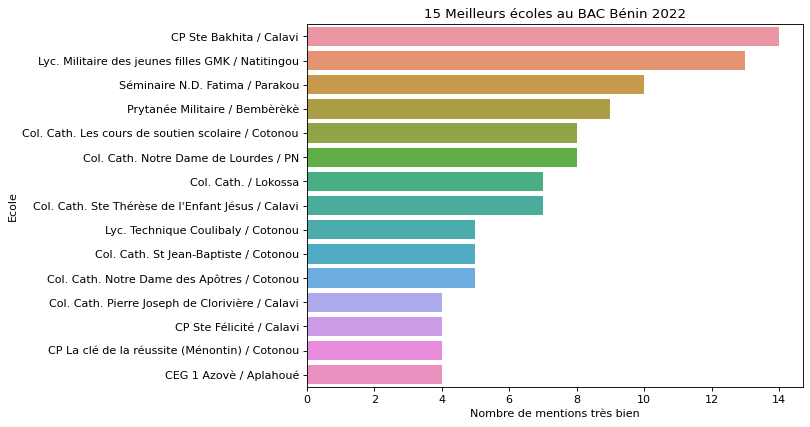

In [8]:
figure(figsize=(8, 6), dpi=80)
school_count = df.ETABLISSEMENT.value_counts()[:15]
sns.barplot(x=school_count.values, y=list(school_count.index))
plt.xlabel("Nombre de mentions très bien")
plt.ylabel("Ecole")
plt.title("15 Meilleurs écoles au BAC Bénin 2022")
plt.show()

On remarque que le **CP Ste Bakhita** et le **Lyc. Militaire des jeunes filles GMK de Natitingou** tire très bien leur épingle du jeu avec respectivement 14 et 13 mentions très bien. Le **Séminaire N.D Fatima de Parakou** n'est égalemnt pas sans reste. Pour ces écoles on remarque généralement un régime interne qui peuvent expliquer ces bon résultats.

# Quelles sont les résultats par Séries ?

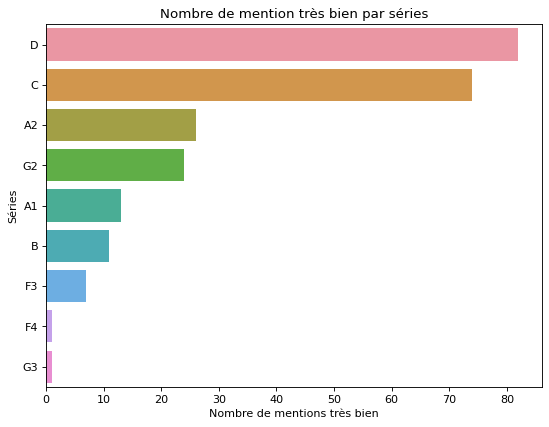

In [9]:
figure(figsize=(8, 6), dpi=80)
faculty_count = df.SERIE.value_counts().sort_values(ascending=False)
sns.barplot(x=faculty_count.values, y=list(faculty_count.index))
plt.xlabel("Nombre de mentions très bien")
plt.ylabel("Séries")
plt.title("Nombre de mention très bien par séries")
plt.show()

Les séries scientifiques `C` et `D` sont ici à l'honneur. Toutefois les séries techniques `F4` et `G3` s'en sortent les moins

# Quelles sont les résultats par villes ?

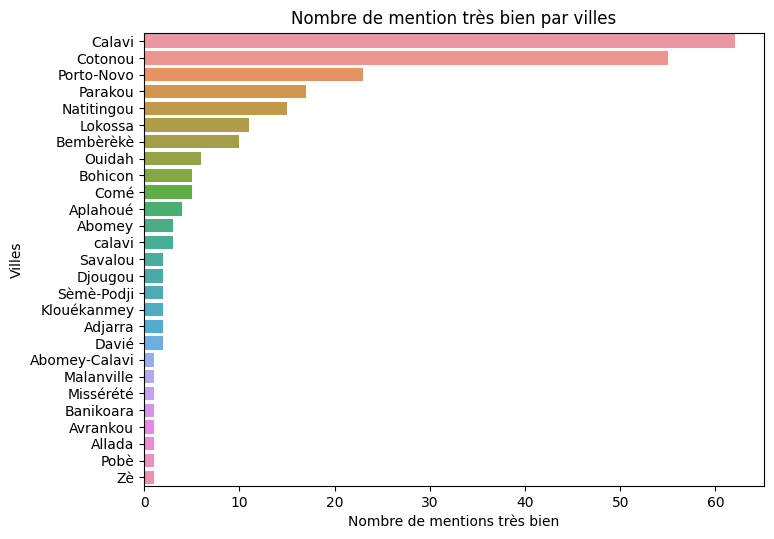

In [10]:
figure(figsize=(8, 6), dpi=100)
city_count = df.Ville.value_counts().sort_values(ascending=False)
sns.barplot(x=city_count.values, y=list(city_count.index))
plt.xlabel("Nombre de mentions très bien")
plt.ylabel("Villes")
plt.title("Nombre de mention très bien par villes")
plt.show()

Ici les villes de `Cotonou` et `Calavi` sont loins devant. Ces villes étant parmis les plus dévéloppés et peuplé on peut très aisement comprendre cette avance.

# Pour finir analysons les résultats par sex

## Quels sex est le mieux reprsenté parmis les mentions très bien?

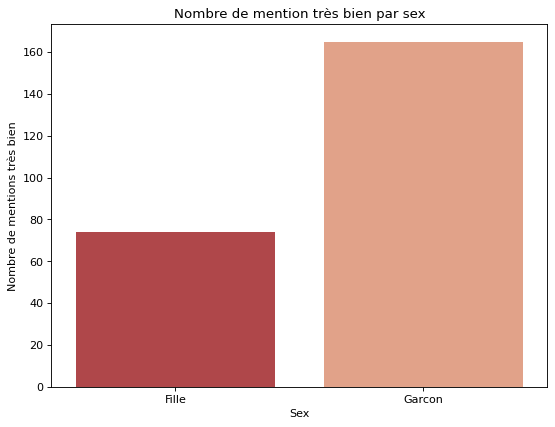

In [11]:
figure(figsize=(8, 6), dpi=80)
sns.countplot(x=df.Sex)
plt.xlabel("Sex")
plt.ylabel("Nombre de mentions très bien")
plt.title("Nombre de mention très bien par sex")
plt.show()

On peut remarquer que les garcons sont le mieux representé. Essayons d'analyser ce resultats par séries.

<Figure size 800x600 with 0 Axes>

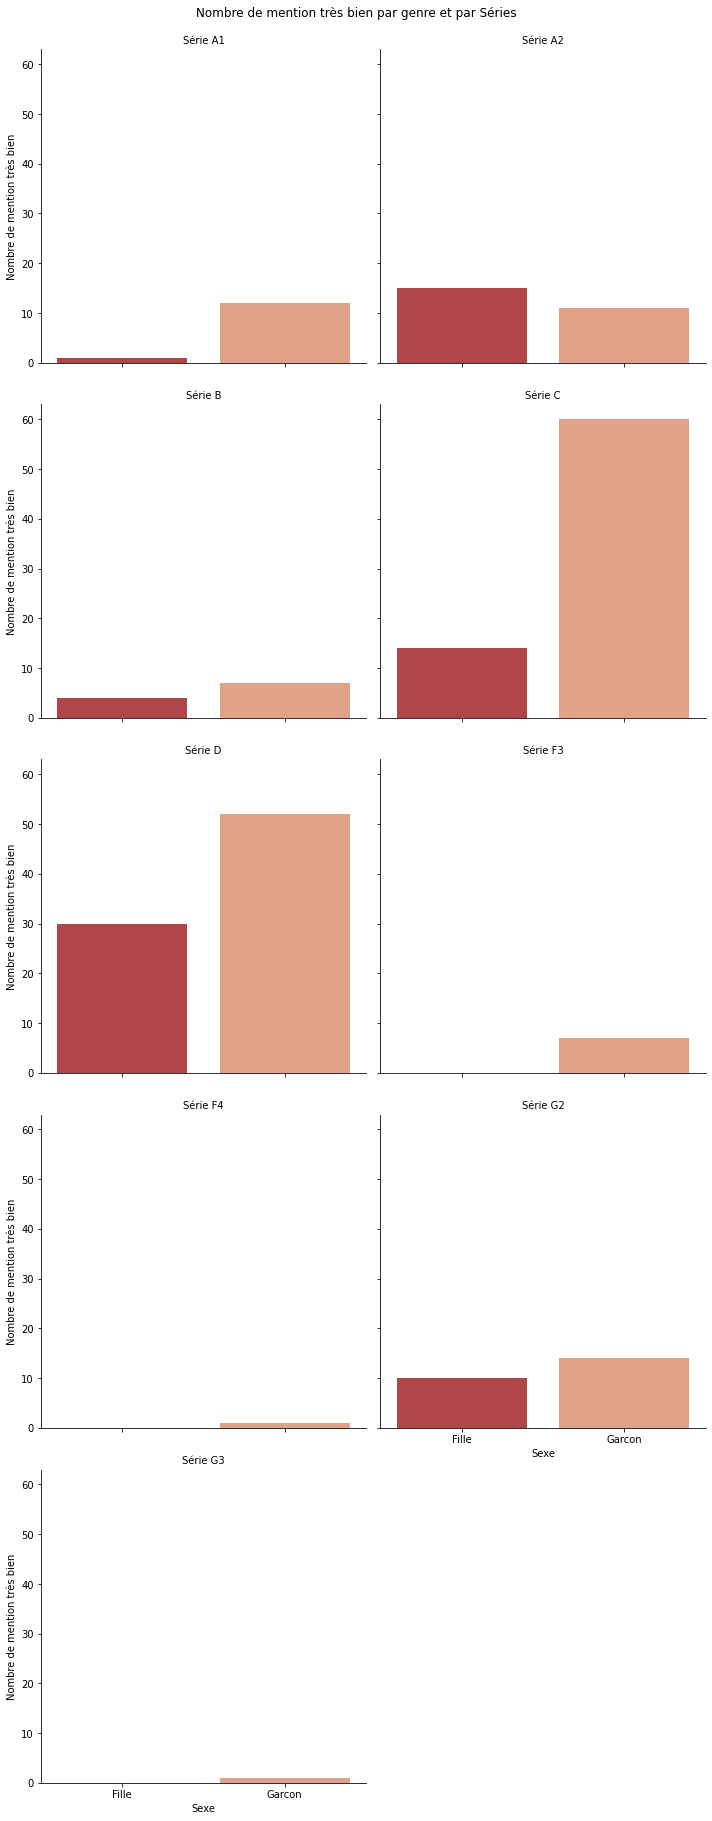

In [12]:
figure(figsize=(8, 6), dpi=100)
plot_sex = sns.catplot(x='Sex', data=df,kind="count", col="SERIE", col_wrap=2)
plot_sex.fig.suptitle('Nombre de mention très bien par genre et par Séries', y=1.01)
plot_sex.set_titles("Série {col_name}")
plot_sex.set(xlabel="Sexe", ylabel="Nombre de mention très bien")
plt.show()

On remarque que dans la quasi-totalité des séries les garcons sont prépondérants, toutefois dans la série `A2`les filles ont un meilleurs taux de mentions très bien

# Distribution des moyennes

<AxesSubplot:xlabel='MOYENNE', ylabel='Density'>

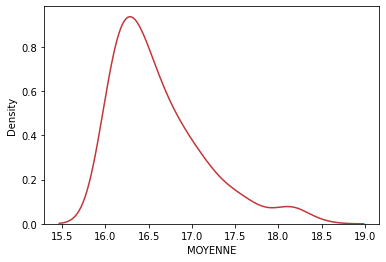

In [13]:
import numpy as np
mean = df.MOYENNE.mean()
std = df.MOYENNE.std()
y = df.MOYENNE
sns.kdeplot(x=y)